# ETL & EDA CONTAMINACIÓN 


### Librerías

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

sns.set_theme(palette="muted")

---
## IMPACTO A CORTO PLAZO - Calidad del Aire

### Carga de dataset y análisis general

In [52]:
# Cargar el archivo Excel
df_AIQ = pd.read_excel(r"..\..\datasets\1. Originales\Contaminación\Consolidados por Ciudad 2018-2023.xlsx")
df_AIQ.head()

,Año,Code,City,# Days with AQI,Good,Moderate,Unhealthy T,Very Unhealthy,Hazardous,AQI Maximum,# Days CO,# Days NO2,# Days O3,# Days PM205,# Days PM10
0,2023,36001,"Albany County, NY",365,245,113,7,0,0,186,0,0,108,257,0
1,2023,36005,"Bronx County, NY",365,197,159,8,1,0,253,0,23,101,241,0
2,2023,36013,"Chautauqua County, NY",363,322,36,5,0,0,133,0,0,334,29,0
3,2023,36027,"Dutchess County, NY",347,333,13,1,0,0,108,0,0,347,0,0
4,2023,36029,"Erie County, NY",365,198,159,8,0,0,176,0,3,79,283,0


Se analiza un Informe resumido del índice de calidad del aire de AirData, el cual muestra un resumen anual de los valores del índice de calidad del aire (AQI) para 27 condados. El índice de calidad del aire es un indicador de la calidad general del aire, ya que tiene en cuenta todos los contaminantes del aire medidos dentro de un área geográfica. Cuanto más alto sea el valor del AQI, mayor será el nivel de contaminación del aire y mayor será el riesgo para la salud. Se analiza la cantidad de días que fueron categorizados según el AQI. Asimismo se analiza  la cantidad de días que cada contaminante afecto en mayor medida en el periodo analizado. (Ej. Días CO: muestra la cantidad de días en el que CO fue el contaminante principal)  

In [53]:
df_AIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Año              162 non-null    int64 
 1   Code             162 non-null    int64 
 2   City             162 non-null    object
 3   # Days with AQI  162 non-null    int64 
 4   Good             162 non-null    int64 
 5   Moderate         162 non-null    int64 
 6   Unhealthy T      162 non-null    int64 
 7   Very Unhealthy   162 non-null    int64 
 8   Hazardous        162 non-null    int64 
 9   AQI Maximum      162 non-null    int64 
 10  # Days CO        162 non-null    int64 
 11  # Days NO2       162 non-null    int64 
 12  # Days O3        162 non-null    int64 
 13  # Days PM205     162 non-null    int64 
 14  # Days PM10      162 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 19.1+ KB


In [54]:
df_AIQ.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,162.0,2020.500000,1.713121,2018.0,2019.00,2020.5,2022.00,2023.0
Code,162.0,36063.962963,32.401382,36001.0,36041.00,36065.0,36087.00,36119.0
# Days with AQI,162.0,356.080247,20.201463,205.0,356.00,364.0,365.00,366.0
Good,162.0,291.956790,43.378351,176.0,270.00,301.5,327.00,359.0
Moderate,162.0,61.802469,45.983232,2.0,20.00,54.5,90.75,178.0
Unhealthy T,162.0,2.271605,3.201368,0.0,0.00,1.0,3.00,13.0
Very Unhealthy,162.0,0.049383,0.217338,0.0,0.00,0.0,0.00,1.0
Hazardous,162.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
AQI Maximum,162.0,116.253086,44.184440,54.0,87.00,105.0,140.00,278.0
# Days CO,162.0,0.030864,0.282466,0.0,0.00,0.0,0.00,3.0


In [55]:
df_AIQ.columns

Index(['Año', 'Code ', 'City', '# Days with AQI', 'Good', 'Moderate',
       'Unhealthy T', 'Very Unhealthy', 'Hazardous', 'AQI Maximum',
       '# Days CO', '# Days NO2', '# Days O3', '# Days PM205', '# Days PM10'],
      dtype='object')

In [56]:
print(df_AIQ.duplicated().sum())

0


### Gráfico 1: Tendencia general de AQI máximo

- En el gráfico se analiza el promedio por año de los valores maximos de AQI (Indice de calidad del Aire) de 27 cóndados analizados. Se puede observar como existe un importante incremento desde 2022 a 2023.

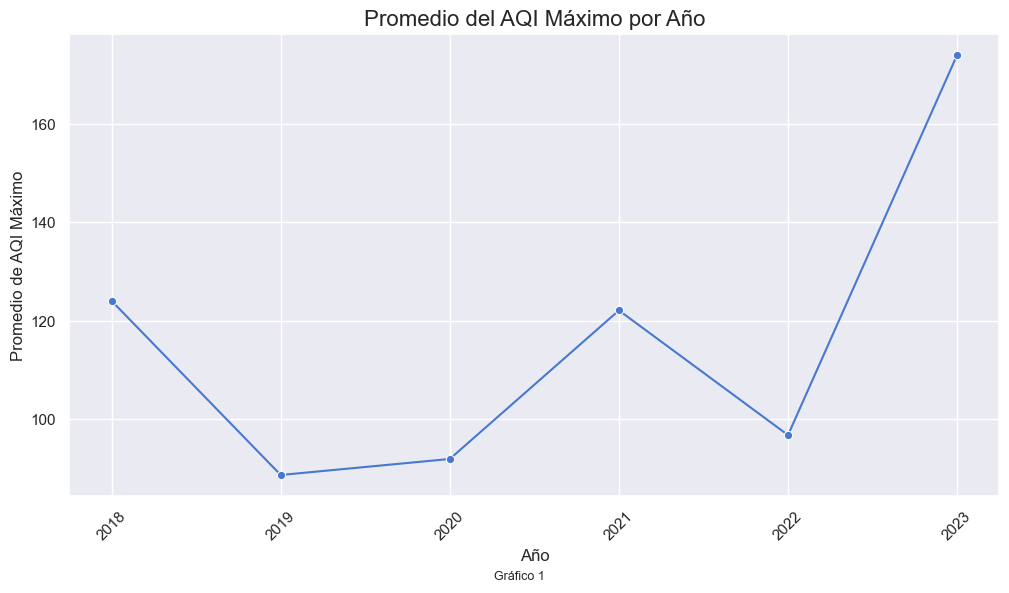

In [57]:
# Agrupar por año y calcular el promedio de AQI máximo
aqi_avg_yearly = df_AIQ.groupby('Año')['AQI Maximum'].mean().reset_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=aqi_avg_yearly, x='Año', y='AQI Maximum', marker='o')
plt.title('Promedio del AQI Máximo por Año', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio de AQI Máximo', fontsize=12)
plt.figtext(0.5, -0.03, "Gráfico 1", wrap=True, horizontalalignment='center', fontsize=9)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Gráfico 2: Tendencia Anual de cantidad de días por categoría sg. AQI
- Se observa que la mayor cantidad de días son "Buenos" y "Moderados", por sobre los días "Insalubres" y "Peligrosos".

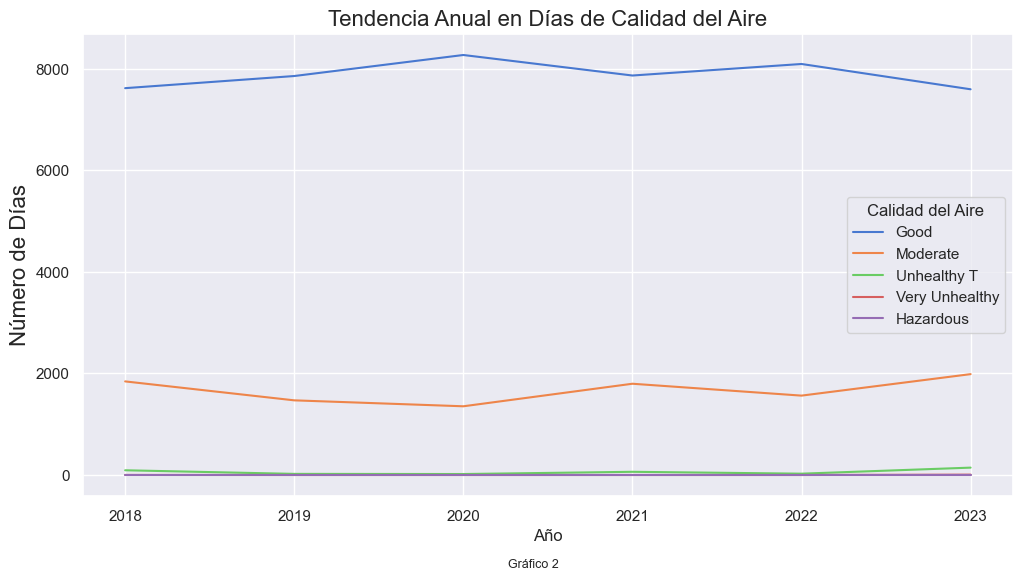

In [58]:
# Gráfico de líneas para tendencias en días de calidad del aire
quality_columns = ['Good', 'Moderate',  
                   'Unhealthy T', 'Very Unhealthy', 'Hazardous']
df_AIQ.groupby('Año')[quality_columns].sum().plot(figsize=(12, 6))
plt.title('Tendencia Anual en Días de Calidad del Aire', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Días', fontsize=16)
plt.legend(title='Calidad del Aire')
plt.figtext(0.5, -0.01, "Gráfico 2", wrap=True, horizontalalignment='center', fontsize=9)
plt.grid(True)
plt.show()

### Gráfico 3: Tendencia anual por categoría de día

Se puede observar en la gráfica que si bien no existe un patrón cíclico, se puede destacar que: 
* Días Buenos: Han disminuido notablemente en el último año bajo análisis.
* Días Moderados: Se ha incrementado en el último período, posiblemente a causa de la disminución de días Buenos.
* Días Insalubres: En 2023 ha aumentado 5 veces respecto del año anterior.
* Días Muy Insalubres: Si bien se mantenía en cero desde 2019 a 2022 se incrementaron notablemnte en el 2023. 
* Días Peligrosos: Mantiene su tendencia en 0.

Text(0.5, 1.05, 'Tendencia Anual en Días de Calidad del Aire')

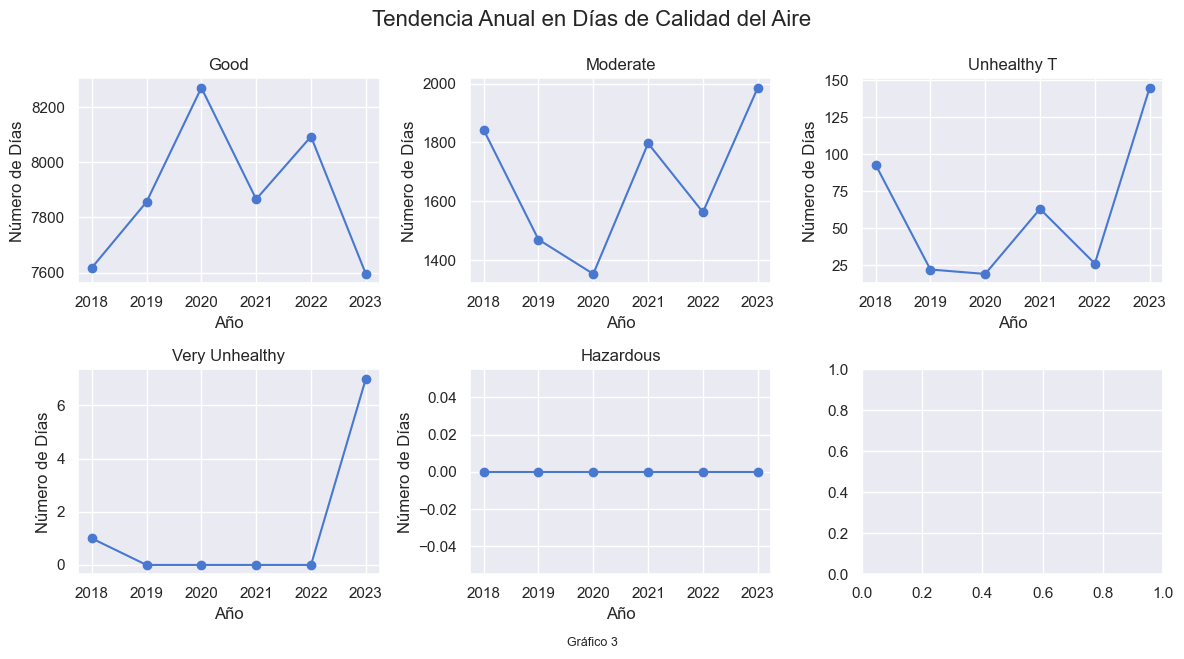

In [59]:
# Definir las columnas de calidad del aire
quality_columns = ['Good', 'Moderate', 'Unhealthy T', 
                    'Very Unhealthy', 'Hazardous']

# Agrupar por año y sumar los días para cada categoría de calidad del aire
grouped_data = df_AIQ.groupby('Año')[quality_columns].sum()

# Crear una cuadrícula de subgráficos con 2 filas y 3 columnas
num_columns = len(quality_columns)
num_rows = (num_columns + 2) // 3  # Calcular el número de filas necesarias
fig, axes = plt.subplots(num_rows, 3, figsize=(12, 6))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Crear un gráfico para cada variable
for ax, column in zip(axes, quality_columns):
    ax.plot(grouped_data.index, grouped_data[column], marker='o')
    ax.set_title(column)
    ax.set_xlabel('Año')
    ax.set_ylabel('Número de Días')
    ax.grid(True)

# Ajustar el layout
plt.figtext(0.5, -0.01, "Gráfico 3", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.suptitle('Tendencia Anual en Días de Calidad del Aire', fontsize=16, y=1.05)

### Gráfico 4: Tendencia y comparativa sobre Contaminantes Principales a lo largo de los años
- En el gráfico se puede observar como son ampliamente superiores las cantidades de días con PM2.5 y O3 como contaminante principal.

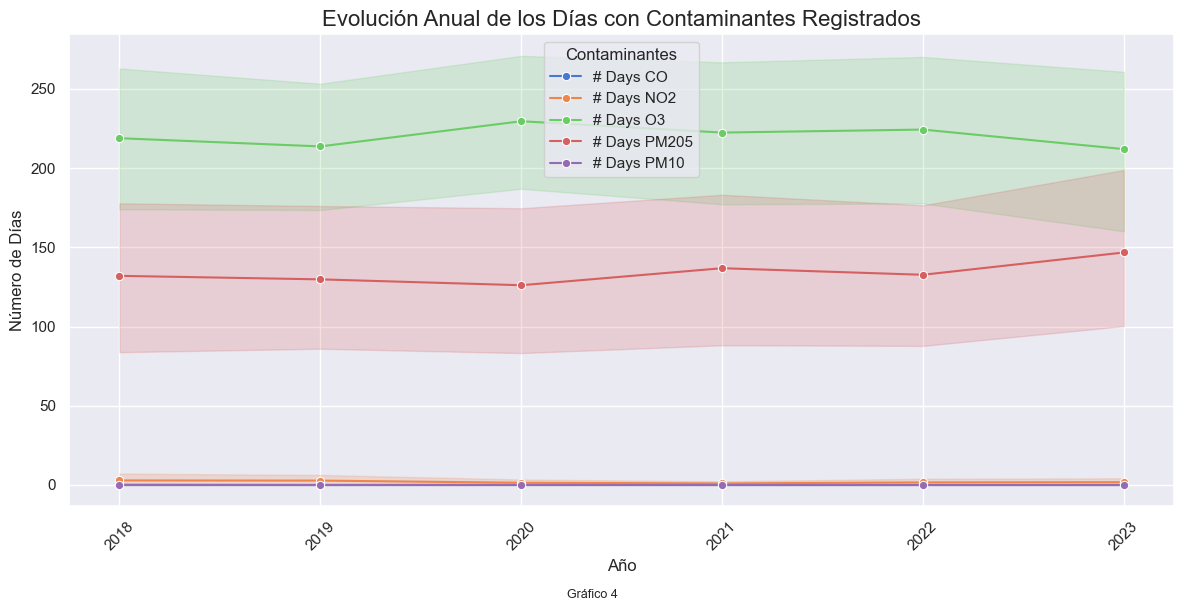

In [60]:
# Seleccionamos las columnas relevantes
columns_to_plot = ['# Days CO', '# Days NO2', '# Days O3', '# Days PM205', '# Days PM10']

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Generamos una línea para cada contaminante
for column in columns_to_plot:
    sns.lineplot(data=df_AIQ, x='Año', y=column, marker='o', label=column)

# Personalización del gráfico
plt.title('Evolución Anual de los Días con Contaminantes Registrados', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Días', fontsize=12)
plt.legend(title="Contaminantes")
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.figtext(0.5, -0.01, "Gráfico 4", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()


### Gráfico 5: Promedio de AQI máximos en lo 5 Borough de NY
- Se puede observar como Queens es el Borough con un promedio mas alto de AQI máximo y Kings es el que tiene un promedio menor.

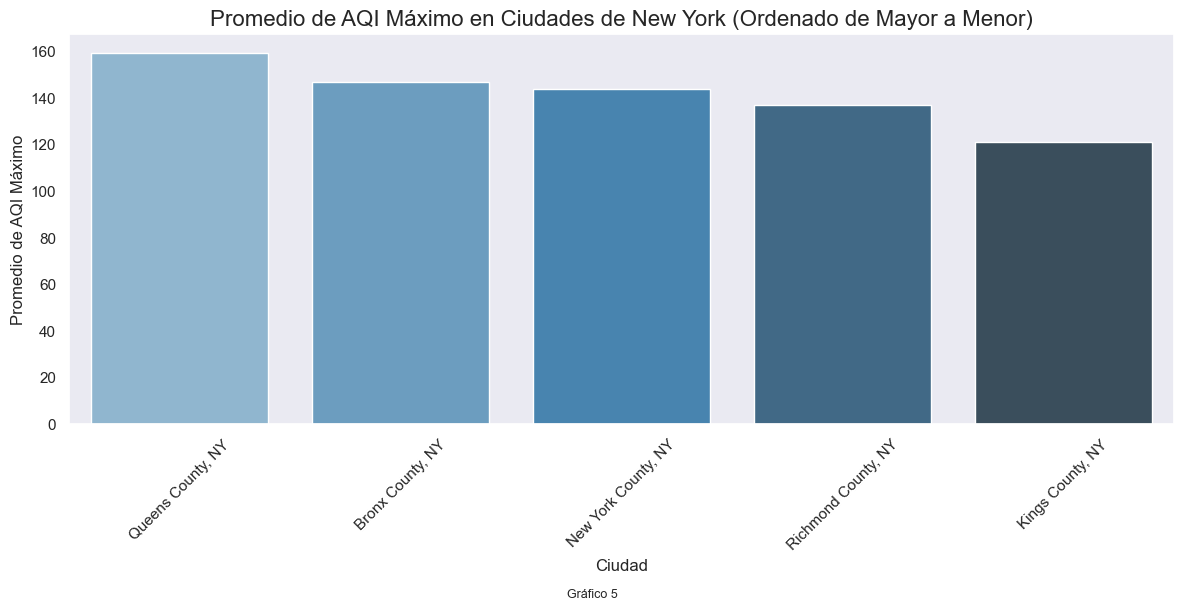

In [61]:
# Filtrar el DataFrame para considerar solo los Borough
ciudades_especificas = ['Bronx County, NY', 'Kings County, NY', 'New York County, NY', 'Queens County, NY', 'Richmond County, NY']
df_ciudades = df_AIQ[df_AIQ['City'].isin(ciudades_especificas)]

# Calcular el promedio de 'AQI Maximum' para cada ciudad y ordenar de mayor a menor
promedio_aqi_max = df_ciudades.groupby('City')['AQI Maximum'].mean().sort_values(ascending=False)

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para el promedio de AQI máximo
sns.barplot(x=promedio_aqi_max.index, y=promedio_aqi_max.values, palette="Blues_d")

# Personalización del gráfico
plt.title('Promedio de AQI Máximo en Ciudades de New York (Ordenado de Mayor a Menor)', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Promedio de AQI Máximo', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.figtext(0.5, -0.01, "Gráfico 5", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()



### Gráfico 6: Análisis de contaminante principal por Borough
- Se puede observar que en las cinco ciudades es predominante el contaminante PM2.5 como principal en mayor proporción, seguido por O3.

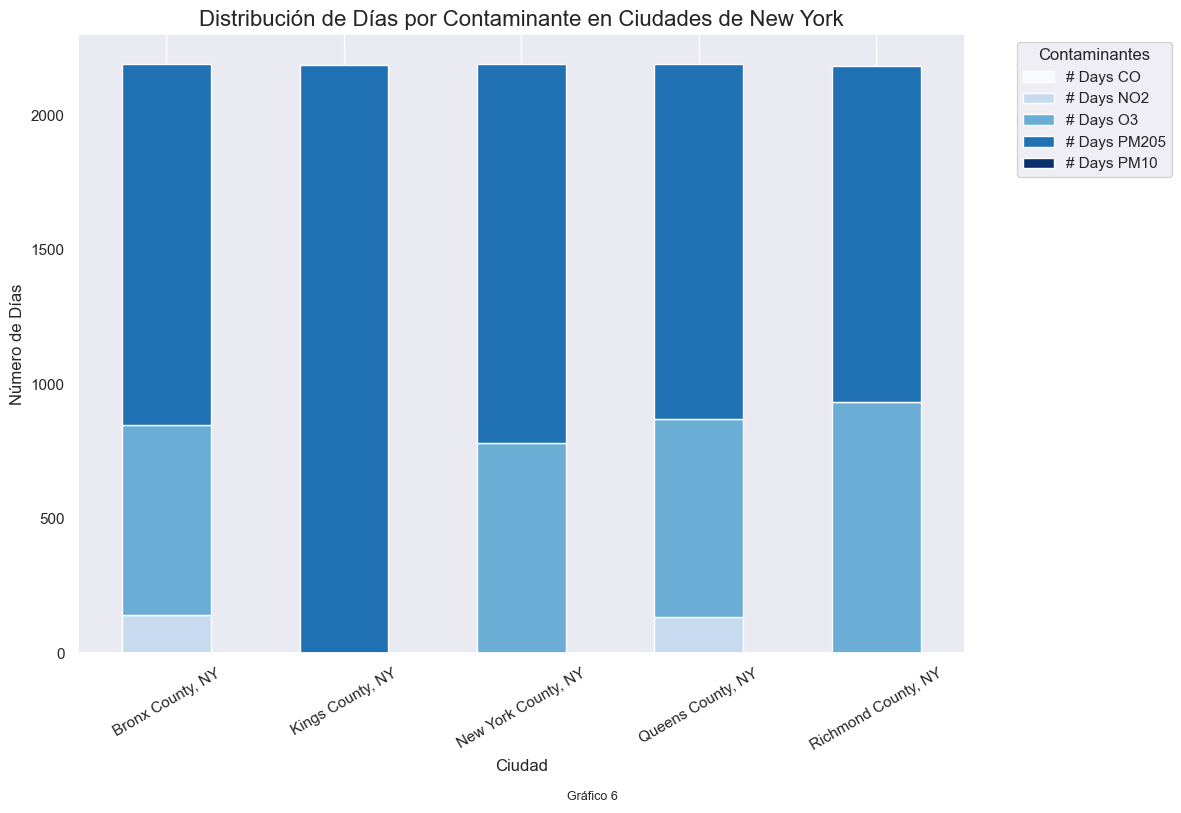

In [75]:
# Filtrar el DataFrame para los 5 Borough
ciudades_especificas = ['Bronx County, NY', 'Kings County, NY', 'New York County, NY', 'Queens County, NY', 'Richmond County, NY']
df_ciudades = df_AIQ[df_AIQ['City'].isin(ciudades_especificas)]

# Sumar los días de cada contaminante por ciudad
dias_por_contaminante = df_ciudades.groupby('City')[['# Days CO', '# Days NO2', '# Days O3', '# Days PM205', '# Days PM10']].sum()

# Crear el gráfico de columnas apiladas
dias_por_contaminante.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Blues')

# Personalización del gráfico
plt.title('Distribución de Días por Contaminante en Ciudades de New York', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Días', fontsize=12)
plt.xticks(rotation=30)
plt.legend(title='Contaminantes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Mostrar el gráfico
plt.figtext(0.5, -0.01, "Gráfico 6", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()

## IMPACTO A LARGO PLAZO - Emisiones de CO2

### Carga de dataset y análisis general

FUENTE:
https://data.cityofnewyork.us/Environment/NYC-Greenhouse-Gas-Emissions-Inventory/wq7q-htne/about_data

https://climate.cityofnewyork.us/initiatives/nyc-greenhouse-gas-inventories/


In [63]:
# Cargar el archivo Excel
df_emission = pd.read_excel(r"..\..\datasets\1. Originales\Contaminación\NYC_Greenhouse_Gas_Emissions_Inventory_20241105.xlsx")
df_emission.head()

,Inventory Type,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2005 Consumed,CY 2005 tCO2e (100 yr GWP),CY 2005 Source MMBtu,...,CY 2020 Source MMBtu,CY 2020 tCO2e 20 yr GWP,CY 2021 Consumed,CY 2021 tCO2e,CY 2021 Source MMBtu,CY 2021 tCO2e 20 yr GWP,CY 2022 Consumed,CY 2022 tCO2e,CY 2022 Source MMBtu,CY 2022 tCO2e 20 yr GWP
0,GPC,Stationary Energy,Residential (small and large residential),Residential,#2 fuel oil,#2 fuel oil,gallon,1.466460e+08,1517199.47,2.043952e+07,...,1.352207e+07,1025993.31,9.445374e+07,977218.37,1.316496e+07,998897.39,1.059489e+08,1096146.81,1.476715e+07,1120464.19
1,GPC,Stationary Energy,Residential (small and large residential),Residential,#4 fuel oil,#4 fuel oil,gallon,7.786078e+07,856170.38,1.148135e+07,...,5.463796e+06,408347.79,4.383733e+07,482042.75,6.464253e+06,483118.96,4.054991e+07,445893.70,5.979490e+06,446889.20
2,GPC,Stationary Energy,Residential (small and large residential),Residential,#6 fuel oil,#6 fuel oil,gallon,1.938461e+08,2191711.04,2.936768e+07,...,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.00,0.000000e+00,0.00
3,GPC,Stationary Energy,Residential (small and large residential),Residential,Biofuel,Biofuel,gallon,7.194951e+05,4.73,9.301632e+04,...,1.875806e+06,208.94,1.206234e+07,79.25,1.559419e+06,173.70,1.252900e+07,82.32,1.619750e+06,180.42
4,GPC,Stationary Energy,Residential (small and large residential),Residential,Electricity,Electricity,kWh,1.416836e+10,7058136.66,1.232733e+08,...,1.268308e+08,4224465.95,1.462245e+10,4801106.85,1.272241e+08,4806199.89,1.448722e+10,4681763.73,1.260475e+08,4686785.01


In [64]:
df_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Inventory Type              55 non-null     object 
 1   Sectors Sector              55 non-null     object 
 2   Category Full               55 non-null     object 
 3   Category Label              55 non-null     object 
 4   Source Full                 55 non-null     object 
 5   Source Label                55 non-null     object 
 6   Source Units                55 non-null     object 
 7   CY 2005 Consumed            55 non-null     float64
 8   CY 2005 tCO2e (100 yr GWP)  55 non-null     float64
 9   CY 2005 Source MMBtu        55 non-null     float64
 10  CY 2005 tCO2e 20 yr GWP     55 non-null     float64
 11  CY 2006 Consumed            55 non-null     float64
 12  CY 2006 tCO2e (100 yr GWP)  55 non-null     float64
 13  CY 2006 Source MMBtu        55 non-nu

In [65]:
df_emission.describe()

,CY 2005 Consumed,CY 2005 tCO2e (100 yr GWP),CY 2005 Source MMBtu,CY 2005 tCO2e 20 yr GWP,CY 2006 Consumed,CY 2006 tCO2e (100 yr GWP),CY 2006 Source MMBtu,CY 2006 tCO2e 20 yr GWP,CY 2007 Consumed,CY 2007 tCO2e (100 yr GWP),...,CY 2020 Source MMBtu,CY 2020 tCO2e 20 yr GWP,CY 2021 Consumed,CY 2021 tCO2e,CY 2021 Source MMBtu,CY 2021 tCO2e 20 yr GWP,CY 2022 Consumed,CY 2022 tCO2e,CY 2022 Source MMBtu,CY 2022 tCO2e 20 yr GWP
count,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1.558419e+10,1.177124e+06,3.717235e+07,1.802399e+06,1.507315e+10,1.058356e+06,3.613272e+07,1.731287e+06,1.624574e+10,1.118350e+06,...,3.731229e+07,1.436593e+06,1.946681e+10,9.452804e+05,3.820252e+07,1.539441e+06,2.018825e+10,9.764562e+05,3.945634e+07,1.584540e+06
std,3.862003e+10,2.850431e+06,6.347897e+07,3.160711e+06,3.686730e+10,2.624716e+06,6.280789e+07,3.051296e+06,4.047358e+10,2.720190e+06,...,6.196692e+07,2.499579e+06,4.615577e+10,2.409418e+06,6.346892e+07,2.709120e+06,4.777747e+10,2.492814e+06,6.538812e+07,2.789680e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.606188e+06,0.000000e+00,1.423738e+05,4.011657e+04,1.521049e+06,0.000000e+00,1.939050e+05,3.754507e+04,1.834961e+06,0.000000e+00,...,1.319058e+05,1.845450e+04,1.582970e+06,0.000000e+00,4.498964e+04,2.129397e+04,1.583598e+06,0.000000e+00,1.482452e+05,2.383717e+04
50%,1.938461e+08,4.722209e+04,7.067265e+06,3.724410e+05,1.637661e+08,4.745695e+04,7.045249e+06,4.016579e+05,2.031415e+08,3.245228e+04,...,5.425730e+06,2.453303e+05,9.445374e+07,1.853641e+04,6.021581e+06,1.907520e+05,1.059489e+08,1.714634e+04,5.979490e+06,2.681799e+05
75%,1.147413e+10,8.579576e+05,2.646262e+07,1.452642e+06,1.061004e+10,7.199686e+05,2.414737e+07,1.346207e+06,1.102886e+10,8.298630e+05,...,2.766614e+07,1.378564e+06,1.105781e+10,4.688175e+05,2.709521e+07,1.413813e+06,1.109011e+10,4.662721e+05,2.843707e+07,1.475715e+06
max,1.648401e+11,1.306483e+07,2.281826e+08,1.308397e+07,1.566905e+11,1.282808e+07,2.360769e+08,1.284326e+07,1.726122e+11,1.278686e+07,...,1.931482e+08,9.968887e+06,1.777128e+11,1.205482e+07,1.914500e+08,1.206335e+07,1.829566e+11,1.265289e+07,1.970991e+08,1.266182e+07


In [66]:
df_emission.columns

Index(['Inventory Type', 'Sectors Sector', 'Category Full', 'Category Label',
       'Source Full', 'Source Label', 'Source Units', 'CY 2005 Consumed',
       'CY 2005 tCO2e (100 yr GWP)', 'CY 2005 Source MMBtu',
       'CY 2005 tCO2e 20 yr GWP', 'CY 2006 Consumed',
       'CY 2006 tCO2e (100 yr GWP)', 'CY 2006 Source MMBtu',
       'CY 2006 tCO2e 20 yr GWP', 'CY 2007 Consumed',
       'CY 2007 tCO2e (100 yr GWP)', 'CY 2007 Source MMBtu',
       'CY 2007 tCO2e 20 yr GWP', 'CY 2008 Consumed',
       'CY 2008 tCO2e (100 yr GWP)', 'CY 2008 Source MMBtu',
       'CY 2008 tCO2e 20 yr GWP', 'CY 2009 Consumed',
       'CY 2009 tCO2e (100 yr GWP)', 'CY 2009 Source MMBtu',
       'CY 2009 tCO2e 20 yr GWP', 'CY 2010 Consumed', 'CY 2010 tCO2e',
       'CY 2010 Source MMBtu', 'CY 2010 tCO2e 20 yr GWP', 'CY 2011 Consumed',
       'CY 2011 tCO2e', 'CY 2011 Source MMBtu', 'CY 2011 tCO2e 20 yr GWP',
       'CY 2012 Consumed', 'CY 2012 tCO2e', 'CY 2012 Source MMBtu',
       'CY 2012 tCO2e 20 yr GWP', '

In [67]:
#Dejamos solo las columnas que necesitamos
# Creo una lista con los nombres de las columnas que quiero mantener
columnas_a_conservar = [
    'Inventory Type', 
    'Sectors Sector', 
    'Category Full', 
    'Category Label', 
    'Source Full', 
    'Source Label', 
    'Source Units', 
    'CY 2010 tCO2e', 
    'CY 2011 tCO2e', 
    'CY 2012 tCO2e', 
    'CY 2013 tCO2e', 
    'CY 2014 tCO2e', 
    'CY 2015 tCO2e', 
    'CY 2016 tCO2e', 
    'CY 2017 tCO2e', 
    'CY 2018 tCO2e', 
    'CY 2019 tCO2e', 
    'CY 2020 tCO2e', 
    'CY 2021 tCO2e', 
    'CY 2022 tCO2e'
]

# Filtro el DataFrame
df_emission_f = df_emission[columnas_a_conservar]
df_emission_f.head()

,Inventory Type,Sectors Sector,Category Full,Category Label,Source Full,Source Label,Source Units,CY 2010 tCO2e,CY 2011 tCO2e,CY 2012 tCO2e,CY 2013 tCO2e,CY 2014 tCO2e,CY 2015 tCO2e,CY 2016 tCO2e,CY 2017 tCO2e,CY 2018 tCO2e,CY 2019 tCO2e,CY 2020 tCO2e,CY 2021 tCO2e,CY 2022 tCO2e
0,GPC,Stationary Energy,Residential (small and large residential),Residential,#2 fuel oil,#2 fuel oil,gallon,1460616.98,1429474.50,1295395.41,1658720.73,1272380.74,1659115.95,1268252.31,1094269.00,1391243.07,1409700.65,1003726.23,977218.37,1096146.81
1,GPC,Stationary Energy,Residential (small and large residential),Residential,#4 fuel oil,#4 fuel oil,gallon,837553.17,812476.85,806233.09,965266.25,589794.17,1035033.95,757617.82,812185.37,722944.34,627736.15,407438.15,482042.75,445893.70
2,GPC,Stationary Energy,Residential (small and large residential),Residential,#6 fuel oil,#6 fuel oil,gallon,2171792.92,2038819.57,1590843.58,1180663.93,308996.85,143515.13,19218.42,10625.71,48120.13,0.00,0.00,0.00,0.00
3,GPC,Stationary Energy,Residential (small and large residential),Residential,Biofuel,Biofuel,gallon,9.42,15.36,46.11,66.03,44.42,57.78,48.54,76.66,95.61,106.09,95.33,79.25,82.32
4,GPC,Stationary Energy,Residential (small and large residential),Residential,Electricity,Electricity,kWh,5550419.75,5007826.86,5184113.49,4667425.49,4915571.04,5010081.41,4958238.64,4324533.42,4908552.59,4462329.58,4219821.64,4801106.85,4681763.73


El término tCO2e significa toneladas de CO2 equivalente. Es una unidad de medida utilizada para expresar la cantidad de emisiones de gases de efecto invernadero (GEI) de manera estandarizada, independientemente de cuál sea el gas específico.

### Gráfico 7: Emisiones de CO2 por Año
- A partir de la evolución de toneladas de CO2 equivalente anual, durante los últimos 3 años, si bien hubo una caída en 2020 por la pandamia, se puede ver un evolución incrementan en 2021 y 2022.

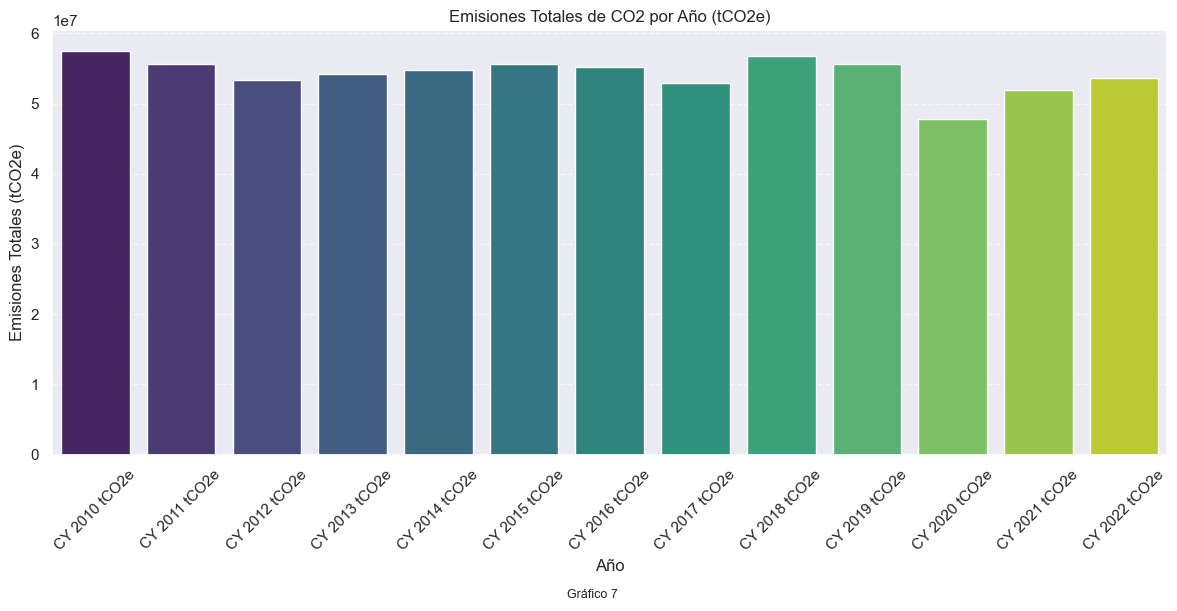

In [68]:
# Seleccionamos las columnas necesarias
anios = ['CY 2010 tCO2e', 'CY 2011 tCO2e', 'CY 2012 tCO2e', 
         'CY 2013 tCO2e', 'CY 2014 tCO2e', 'CY 2015 tCO2e', 
         'CY 2016 tCO2e', 'CY 2017 tCO2e', 'CY 2018 tCO2e', 
         'CY 2019 tCO2e', 'CY 2020 tCO2e', 'CY 2021 tCO2e', 
         'CY 2022 tCO2e']

# Agrupamos las emisiones totales por año sumando todas las emisiones de sectores
emisiones_totales_anuales = df_emission_f[anios].sum()

# Convertimos el índice en una columna para que los años aparezcan como valores
emisiones_totales_anuales = emisiones_totales_anuales.reset_index()
emisiones_totales_anuales.columns = ['Año', 'Emisiones Totales']

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_totales_anuales, x='Año', y='Emisiones Totales', palette='viridis')

# Personalizamos el gráfico
plt.title('Emisiones Totales de CO2 por Año (tCO2e)')
plt.xlabel('Año')
plt.ylabel('Emisiones Totales (tCO2e)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.figtext(0.5, -0.01, "Gráfico 7", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()


### Gráfico 8: Emisiones de CO2 por Año y por sector
- Si bien se puede notar que el Sector que más impacta en la generación de CO2 es "Energía", el "Transporte" en general es el segundo mayor generador.

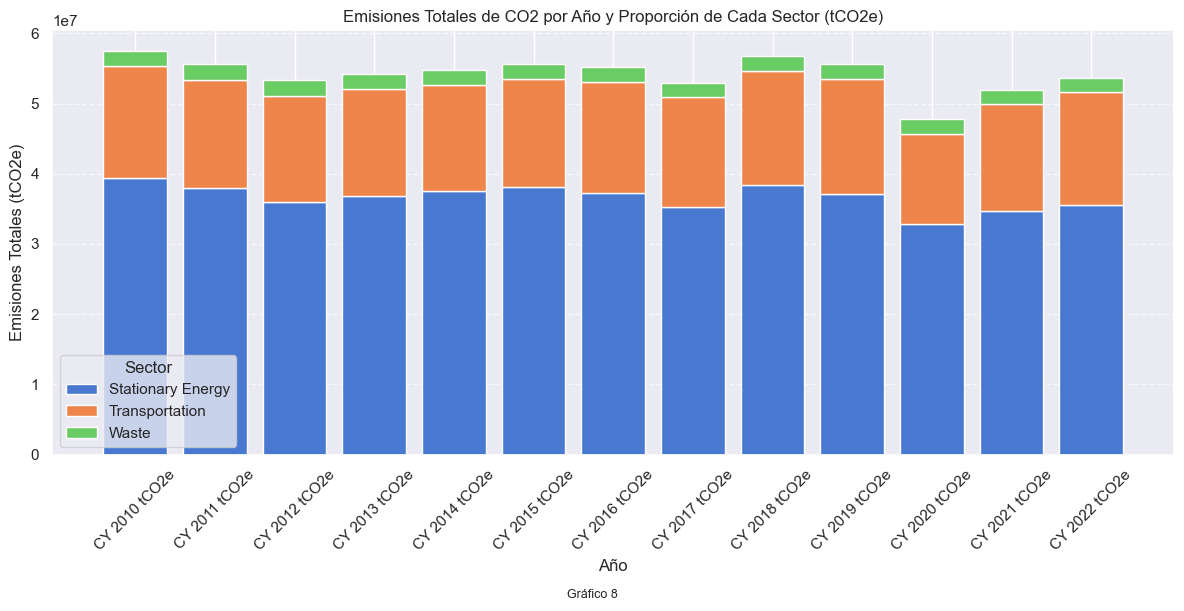

In [69]:
# Seleccionamos las columnas necesarias
anios = ['CY 2010 tCO2e', 'CY 2011 tCO2e', 'CY 2012 tCO2e', 
         'CY 2013 tCO2e', 'CY 2014 tCO2e', 'CY 2015 tCO2e', 
         'CY 2016 tCO2e', 'CY 2017 tCO2e', 'CY 2018 tCO2e', 
         'CY 2019 tCO2e', 'CY 2020 tCO2e', 'CY 2021 tCO2e', 
         'CY 2022 tCO2e']

# Agrupamos los datos por 'Sectors Sector' y sumamos las emisiones por año
emisiones_apiladas = df_emission_f.groupby('Sectors Sector')[anios].sum()

# Transponemos el DataFrame para que los años sean el índice y los sectores las columnas
emisiones_apiladas = emisiones_apiladas.transpose()

# Creamos el gráfico de barras apiladas
plt.figure(figsize=(12, 6))
bottom = None  # Variable para almacenar la posición inferior de cada sector en la pila

# Iteramos sobre cada sector para apilar sus emisiones en cada año
for sector in emisiones_apiladas.columns:
    if bottom is None:
        bottom = emisiones_apiladas[sector]
        plt.bar(emisiones_apiladas.index, emisiones_apiladas[sector], label=sector)
    else:
        plt.bar(emisiones_apiladas.index, emisiones_apiladas[sector], bottom=bottom, label=sector)
        bottom += emisiones_apiladas[sector]

# Personalizamos el gráfico
plt.title('Emisiones Totales de CO2 por Año y Proporción de Cada Sector (tCO2e)')
plt.xlabel('Año')
plt.ylabel('Emisiones Totales (tCO2e)')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.figtext(0.5, -0.01, "Gráfico 8", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()


### Gráfico 9: Proporción de Emisiones de CO2 por Sector en último año
- Como podemos observar practicamente el 30% de las emisiones de CO2 provienen del sector Transporte

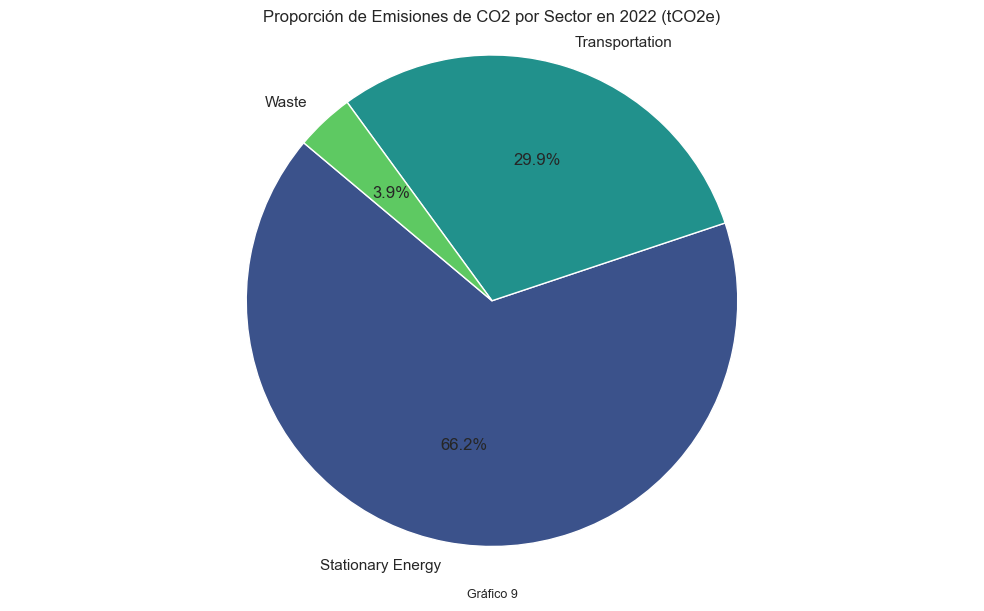

In [70]:
# Filtrar las emisiones para el año 2022 (último año)
emisiones_2022 = df_emission_f[['Sectors Sector', 'CY 2022 tCO2e']]

# Agrupamos y sumamos las emisiones por sector
emisiones_por_sector = emisiones_2022.groupby('Sectors Sector')['CY 2022 tCO2e'].sum()

# Configuramos el color usando la paleta 'viridis'
colors = sns.color_palette('viridis', len(emisiones_por_sector))

# Creamos el gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(emisiones_por_sector, labels=emisiones_por_sector.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Personalizamos el gráfico
plt.title('Proporción de Emisiones de CO2 por Sector en 2022 (tCO2e)')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.tight_layout()

# Mostramos el gráfico
plt.figtext(0.5, -0.01, "Gráfico 9", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()


In [71]:
# Filtramos los datos para el sector "Transporte" y el año 2022
emisiones_transporte_2022 = df_emission_f[df_emission_f['Sectors Sector'] == 'Transportation']['CY 2022 tCO2e']

# Sumamos los valores
total_emisiones_transporte_2022 = round(emisiones_transporte_2022.sum())

# Mostramos el resultado
print(f'Total de emisiones para el sector Transporte en 2022: {total_emisiones_transporte_2022} tCO2e')

Total de emisiones para el sector Transporte en 2022: 16063672 tCO2e


### Gráfico 10: Emisiones del Sector Transporte (On-Road) por Categoría en el último año.
CATEGORIAS DE TRANSPORTE:
- Passenger Cars: Son los vehículos de pasajeros estándar, como sedanes y SUVs, utilizados por individuos y familias para el transporte personal.

- Medium Duty Trucks: Se refiere a camiones que son más grandes que los vehículos ligeros, típicamente utilizados para transporte comercial y de mercancías. Tienen una capacidad de peso entre 10,001 y 26,000 libras.

- Heavy Duty Trucks: Estos son camiones de gran tamaño diseñados para el transporte de cargas pesadas, como camiones de carga y tractores. Su capacidad de peso supera las 26,000 libras.

- SWCV (Single Unit Work Class Vehicles): Se refiere a vehículos de trabajo que suelen ser vehículos de una sola unidad, como camiones de servicio que pueden incluir vehículos de construcción, mantenimiento o servicios públicos.

- School Bus: Vehículos diseñados específicamente para el transporte de estudiantes a y desde la escuela. Son fácilmente reconocibles por su color amarillo y suelen tener características de seguridad específicas.

- Bus: Se refiere a vehículos de transporte público que pueden llevar un gran número de pasajeros. Incluye autobuses urbanos que operan en rutas programadas.

El transporte de pasajeros (particulares como taxis) es ampliamente superior en la generación de CO2 por su volumen, superando ampliamente los 12 Mill de toneladas

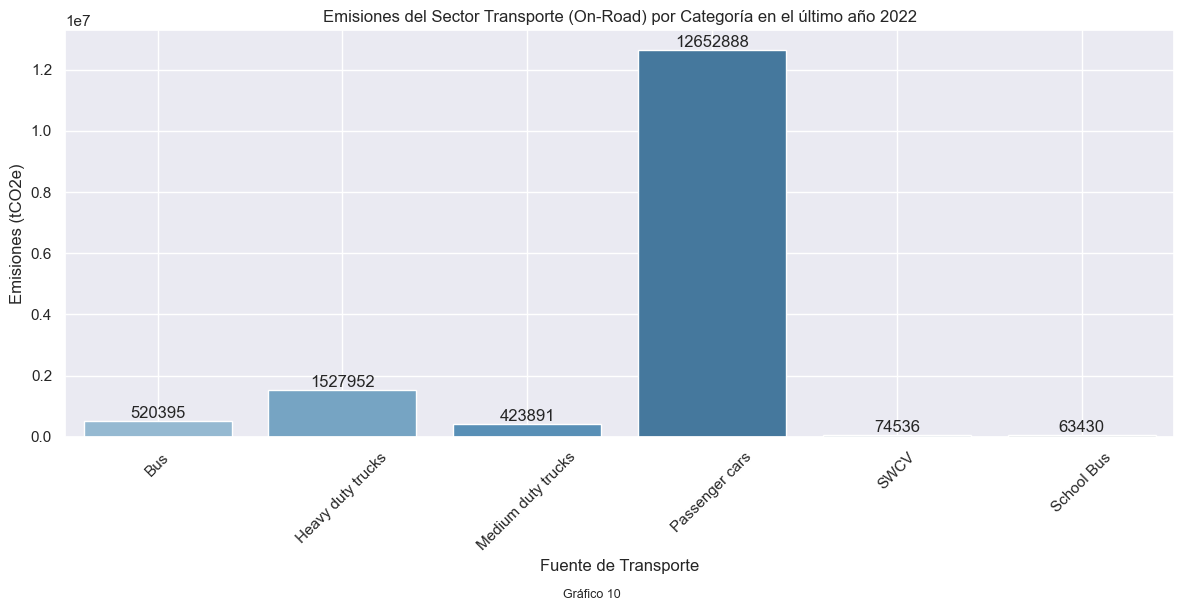

In [76]:
# Filtramos el DataFrame para el sector Transporte y la categoría On-Road
df_transporte = df_emission[(df_emission['Sectors Sector'] == 'Transportation') &
                             (df_emission['Category Full'] == 'On-Road')]

# Agrupamos por Source Full y sumamos las emisiones para 2022
emisiones_2022 = df_transporte.groupby('Source Full')['CY 2022 tCO2e'].sum().reset_index()

# Redondeamos las emisiones a enteros
emisiones_2022['CY 2022 tCO2e'] = emisiones_2022['CY 2022 tCO2e'].round().astype(int)

# Creamos el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=emisiones_2022, x='Source Full', y='CY 2022 tCO2e', palette="Blues_d")

# Añadimos etiquetas y título
plt.title('Emisiones del Sector Transporte (On-Road) por Categoría en el último año 2022')
plt.xlabel('Fuente de Transporte')
plt.ylabel('Emisiones (tCO2e)')
plt.xticks(rotation=45)
plt.grid(True)

# Añadimos etiquetas a cada barra
for index, value in enumerate(emisiones_2022['CY 2022 tCO2e']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostramos el gráfico
plt.figtext(0.5, -0.01, "Gráfico 10", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()


In [73]:
# Filtramos los datos para el sector "Transporte", "On-Road" y "Passenger cars" para el año 2022
emisiones_on_road_cars_2022 = df_emission_f[
    (df_emission_f['Sectors Sector'] == 'Transportation') & 
    (df_emission_f['Category Full'] == 'On-Road') & 
    (df_emission_f['Source Full'] == 'Passenger cars')
]['CY 2022 tCO2e']

# Sumamos los valores y redondeamos a enteros
total_emisiones_on_road_cars_2022 = round(emisiones_on_road_cars_2022.sum())

# Mostramos el resultado
print(f'Total de emisiones para el sector Transporte (On-Road, Passenger cars) en 2022: {total_emisiones_on_road_cars_2022} tCO2e')


Total de emisiones para el sector Transporte (On-Road, Passenger cars) en 2022: 12652888 tCO2e
